In [96]:
from matplotlib import pyplot as plt
import pandas as pd
import os
import seaborn as sns
import numpy as np

dir = "data"
files = [dir + '/' + fname for fname in os.listdir(dir) if '.csv' in fname]

In [74]:
# load data
frames = []
for fname in files:
    frames.append(pd.read_csv(fname))
df = pd.concat(frames).sort_index(level="nw")

In [81]:
df.index == 0
df.iloc[df.index==0,:]

,nc,nw,nt,cg,ca,ck,ta,tk0,tk1
0,10.0,100.0,75.0,7.278691,2.673554,3.120269,15.333440,1.158817,0.591212
0,10.0,100.0,75.0,7.442633,2.582248,3.080911,17.708772,0.583184,0.207339
0,10.0,100.0,75.0,8.772439,2.601828,3.008481,14.514025,0.614581,0.198409
0,10.0,100.0,75.0,7.218206,2.522700,3.129555,16.274765,1.112283,0.210159
0,10.0,100.0,75.0,8.814817,2.446381,2.871595,15.081254,0.950245,0.218999
...,...,...,...,...,...,...,...,...,...
0,10.0,100.0,75.0,6.356044,2.658890,3.125704,16.754688,0.942891,0.231452
0,10.0,100.0,75.0,7.909484,2.638750,3.142891,11.849322,1.041595,0.180718
0,10.0,100.0,75.0,7.290036,2.497098,2.960147,14.459096,0.709588,0.293340
0,10.0,100.0,75.0,7.813165,2.503216,2.927836,17.410077,0.873849,0.216597


[100.0, 121.0, 144.0, 169.0, 196.0, 225.0, 256.0, 289.0, 324.0, 400.0]

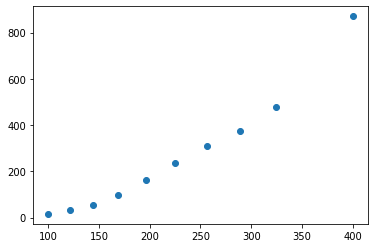

In [117]:
# compute average computation time
nw = [df.loc[df.index==i]["nw"].iloc[0] for i in range(10)]
ta_avg = [df.loc[df.index==i]["ta"].mean() for i in range(10)]
ta_std = [df.loc[df.index==i]["ta"].std() for i in range(10)]
tk0_avg = [df.loc[df.index==i]["tk0"].mean() for i in range(10)]
tk1_avg = [df.loc[df.index==i]["tk1"].mean() for i in range(10)]
tk_avg = [(df.loc[df.index==i]["tk0"]+df.loc[df.index==i]["tk1"]).mean() for i in range(10)]
# plt.plot(nw,ta_avg)
plt.scatter(nw,ta_avg)
nw